In [3]:
df = pd.read_csv('Competitor Pricing Data.csv')

df1 = pd.read_csv('Daily Customer Behavior.csv')

df2 = pd.read_csv('Inventory Data.csv')

df3 = pd.read_csv('Sales Data.csv')

Q5 – Lead Time and Order Fulfillment

Spearman correlation between Lead Time and Backorders: -0.0215
p-value: 0.0015
→ There is a significant correlation: higher lead times are associated with more backorders.

Top 3 Fulfillment Centers by Stock Availability Ratio:
    FC_ID  stock_availability_ratio  fulfilled_ratio
7   FC_08                111.749253         0.993435
0   FC_01                 67.172642         0.988800
11  FC_12                 53.481531         0.991922

Top 3 Fulfillment Centers by Demand Fulfillment Ratio:
    FC_ID  stock_availability_ratio  fulfilled_ratio
1   FC_02                 40.126438         1.000000
2   FC_03                 24.027343         0.996898
19  FC_20                 42.010637         0.996839


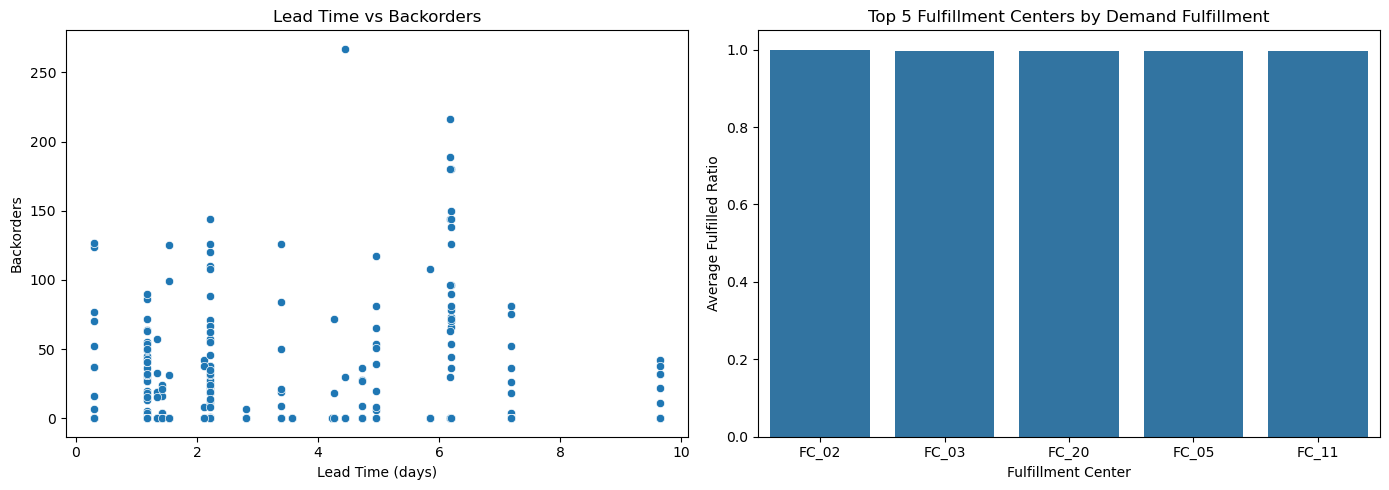

In [4]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns


# --- Step 2: Analyze correlation between LeadTimeFloat and Backorders ---

# Drop rows with missing values in the relevant columns
df_corr = df2[['LeadTimeFloat', 'Backorders']].dropna()

# Compute Spearman correlation
corr, p_value = spearmanr(df_corr['LeadTimeFloat'], df_corr['Backorders'])

print("Q5 – Lead Time and Order Fulfillment\n")
print(f"Spearman correlation between Lead Time and Backorders: {corr:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
 print("→ There is a significant correlation: higher lead times are associated with more backorders.")
else:
 print("→ No significant correlation between lead time and backorders.")

# --- Step 3: Evaluate stock availability vs demand ---

# Avoid division by zero
df2['stock_availability_ratio'] = df2.apply(lambda row: row['StockStart'] / row['Demand'] if row['Demand'] > 0 else 0, axis=1)
df2['fulfilled_ratio'] = df2.apply(lambda row: row['DemandFulfilled'] / row['Demand'] if row['Demand'] > 0 else 0, axis=1)

# Group by fulfillment center
availability = df2.groupby('FC_ID').agg({
 'stock_availability_ratio': 'mean',
 'fulfilled_ratio': 'mean'
}).reset_index()

# Sort to find best centers
best_stock = availability.sort_values(by='stock_availability_ratio', ascending=False)
best_fulfillment = availability.sort_values(by='fulfilled_ratio', ascending=False)

print("\nTop 3 Fulfillment Centers by Stock Availability Ratio:")
print(best_stock.head(3))

print("\nTop 3 Fulfillment Centers by Demand Fulfillment Ratio:")
print(best_fulfillment.head(3))

# --- Step 4: Visualizations ---

plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='LeadTimeFloat', y='Backorders', data=df_corr)
plt.title("Lead Time vs Backorders")
plt.xlabel("Lead Time (days)")
plt.ylabel("Backorders")

plt.subplot(1, 2, 2)
sns.barplot(x='FC_ID', y='fulfilled_ratio', data=best_fulfillment.head(5))
plt.title("Top 5 Fulfillment Centers by Demand Fulfillment")
plt.xlabel("Fulfillment Center")
plt.ylabel("Average Fulfilled Ratio")

plt.tight_layout()
plt.show()